In [6]:
from manim import *
import jupyter_capture_output

video_scene = " -v WARNING --progress_bar None --disable_caching et_Scene"
image_scene = f" -v WARNING --progress_bar None --disable_caching -r {2*427},{2*240}  -s et_Scene"

Jupyter Capture Output v0.0.11


Output saved by creating file at animations/eye_tracking_2/eye_tracking_2.mp4.


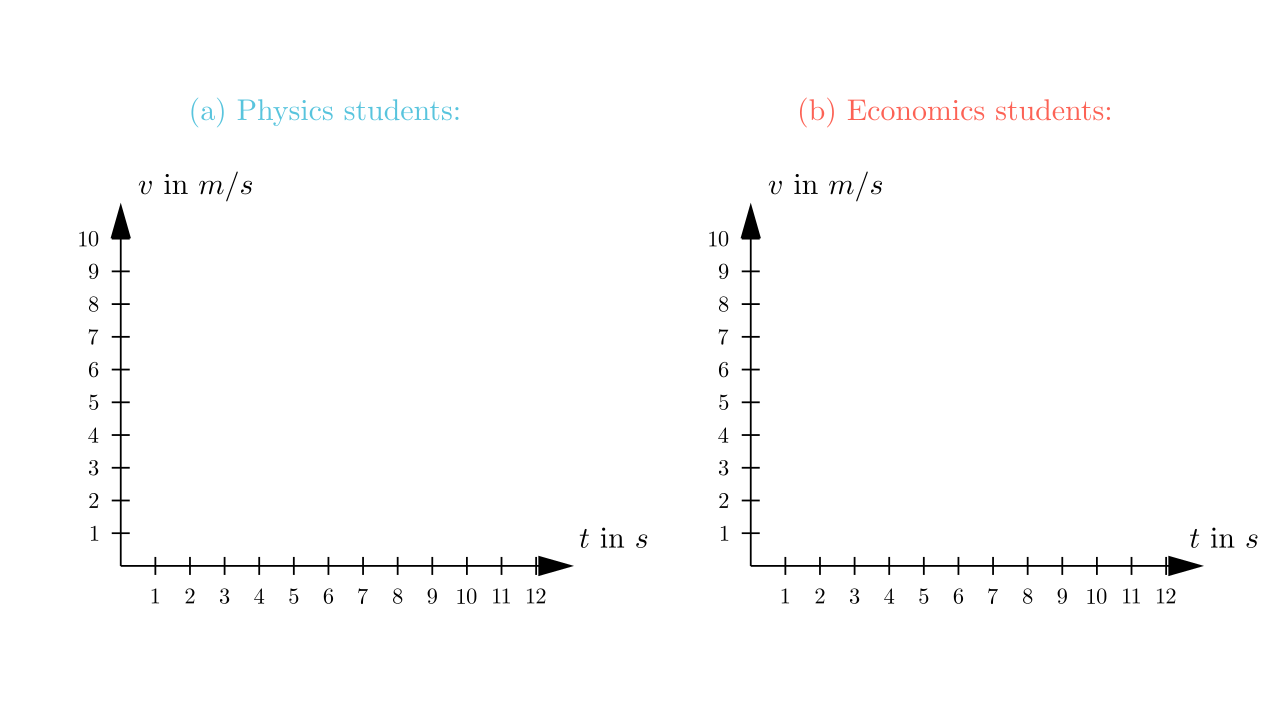

In [98]:
%%capture_video --path "animations/eye_tracking_2/eye_tracking_2.mp4"
%%manim -qm --fps 60 $video_scene


class et_Scene(Scene):
    def construct(self):
        self.camera.background_color=WHITE

        x_range = [0, 13, 1]
        y_range = [0, 11, 1]


        def get_grid():

        ax1_base = np.array([-3.5, -0.5, 0])
        ax2_base = np.array([3.5, -0.5, 0])

        text_a = Tex(r'(a) Physics students:', font_size = 32, color = BLUE).move_to(ax1_base + 3.25*UP)
        text_b = Tex(r'(b) Economics students:', font_size = 32, color = RED).move_to(ax2_base + 3.25*UP)
        
        ax1_ax = Axes(x_range = x_range, y_range = y_range, x_length = 5, y_length = 4, axis_config = {"font_size": 24, "tip_width": 0.2}).add_coordinates().move_to(ax1_base).set_color(BLACK)
        ax1_xlabel = ax1_ax.get_x_axis_label(Tex(r"$t$ in $s$", color = BLACK, font_size = 32))
        ax1_ylabel = ax1_ax.get_y_axis_label(Tex(r"$v$ in $m/s$", color = BLACK, font_size = 32))
        ax1 = VGroup(ax1_ax, ax1_xlabel, ax1_ylabel)

        ax2_ax = Axes(x_range = x_range, y_range = y_range, x_length = 5, y_length = 4, axis_config = {"font_size": 24, "tip_width": 0.2, "tip_length": 9999999}).add_coordinates().move_to(ax2_base).set_color(BLACK)
        ax2_xlabel = ax2_ax.get_x_axis_label(Tex(r"$t$ in $s$", color = BLACK, font_size = 32))
        ax2_ylabel = ax2_ax.get_y_axis_label(Tex(r"$v$ in $m/s$", color = BLACK, font_size = 32))
        ax2 = VGroup(ax2_ax, ax2_xlabel, ax2_ylabel)


        self.add(ax1, ax2, text_a, text_b)